In [1]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sns

import plotly.figure_factory as ff
import plotly.graph_objs as go
from imblearn.over_sampling import SMOTE
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, mean_absolute_error, accuracy_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

%matplotlib inline

C:\ProgramData\Miniconda3\envs\tensorflow\lib\site-packages\xgboost\compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
data.isnull().any().any()

False

In [5]:
class_zero = data.Class.value_counts().values[0]
class_one = data.Class.value_counts().values[1]
print(data["Class"].value_counts())

0    284315
1       492
Name: Class, dtype: int64


Text(0.5, 1.0, 'Class distribution')

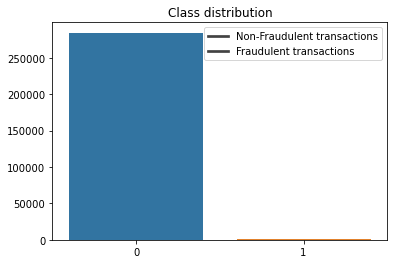

In [6]:

sb.barplot(x=data.Class.value_counts().index.values, y=data.Class.value_counts().values)
plt.legend(labels=['Non-Fraudulent transactions', 'Fraudulent transactions'])
plt.title("Class distribution")

In [7]:
class_0 = data.loc[data['Class'] == 0]["Time"]
class_1 = data.loc[data['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

In [8]:
data['Hour'] = data['Time'].apply(lambda x: np.floor(x / 3600))

tmp = data.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


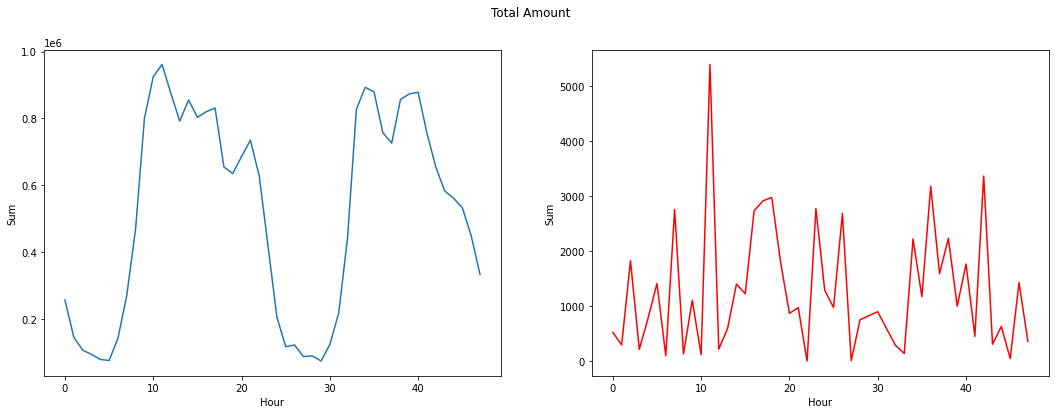

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show()

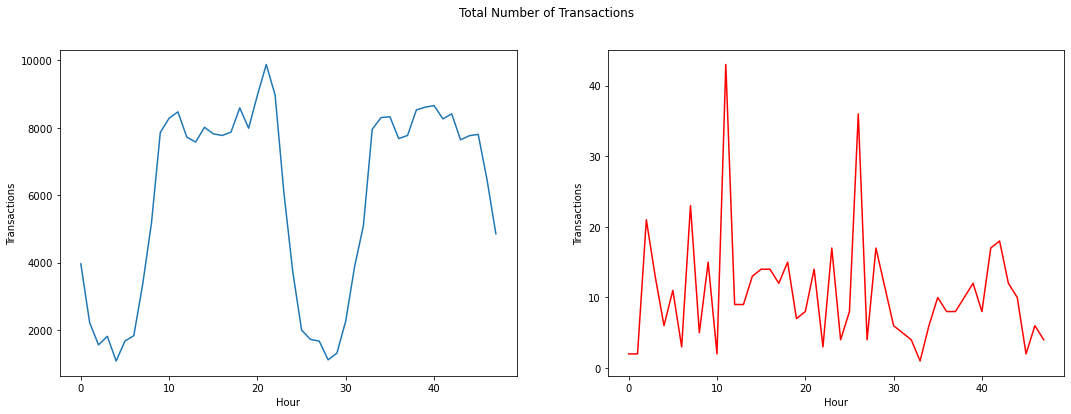

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show()

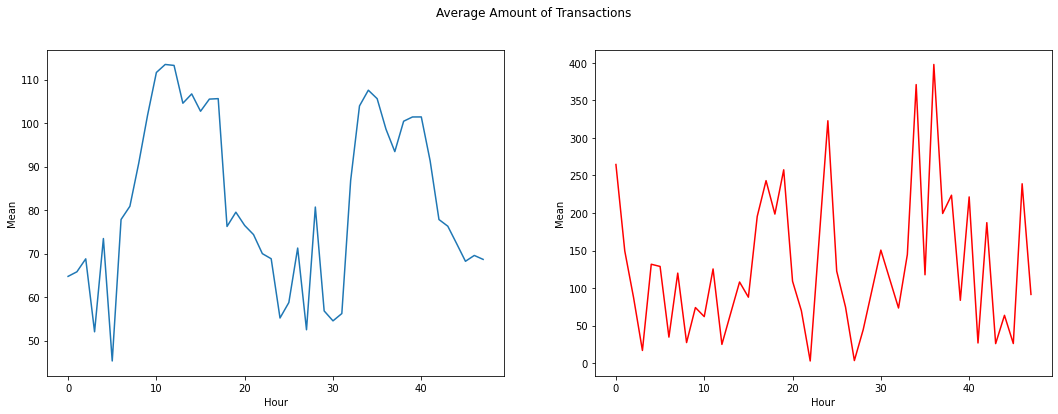

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=df.loc[df.Class==1], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show()

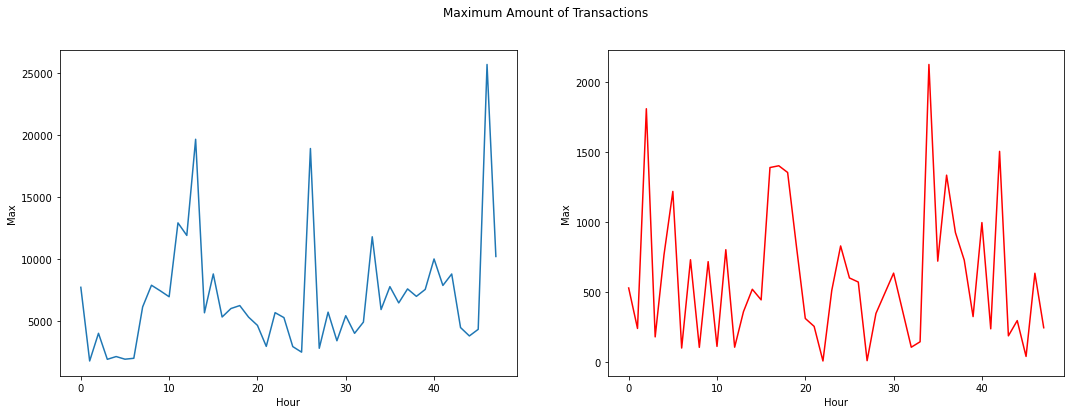

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=df.loc[df.Class==1], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show()

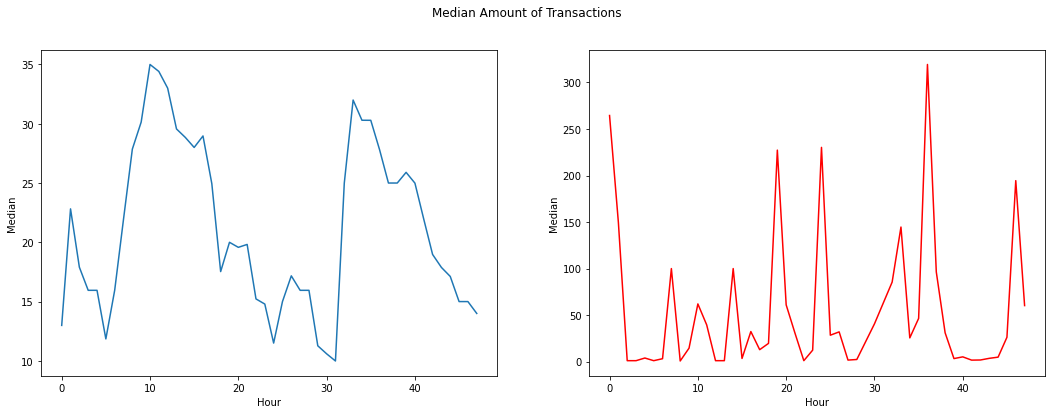

In [13]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Median", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Median", data=df.loc[df.Class==1], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show()

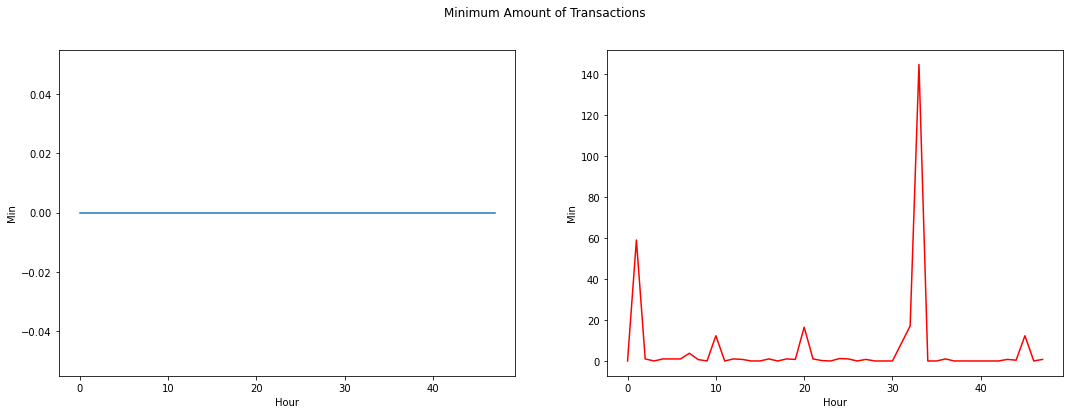

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Min", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=df.loc[df.Class==1], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show()

# Transcation Amount

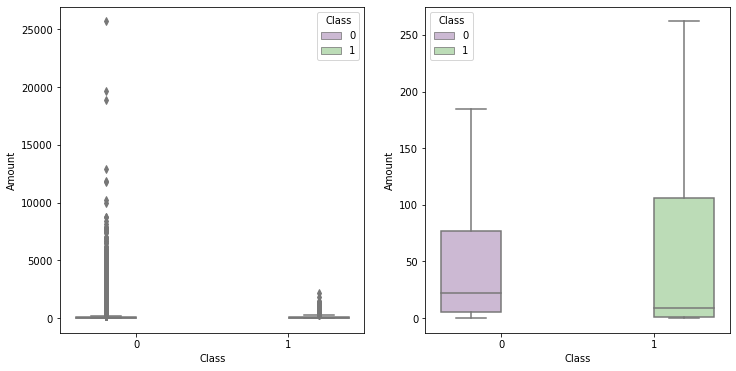

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data, palette="PRGn",showfliers=False)
plt.show()

The real transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers; fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers.

Let's plot the fraudulent transactions (amount) against time. The time is shown is seconds from the start of the time period (totaly 48h, over 2 days).

In [16]:
fraud = data.loc[data['Class'] == 1]

trace = go.Scatter(
    x = fraud['Time'],y = fraud['Amount'],
    name="Amount",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= fraud['Amount'],
    mode = "markers"
)
data1 = [trace]
layout = dict(title = 'Amount of fraudulent transactions',
          xaxis = dict(title = 'Time [s]', showticklabels=True), 
          yaxis = dict(title = 'Amount'),
          hovermode='closest'
         )
fig = dict(data=data1, layout=layout)
iplot(fig, filename='fraud-amount')

# Features correlation

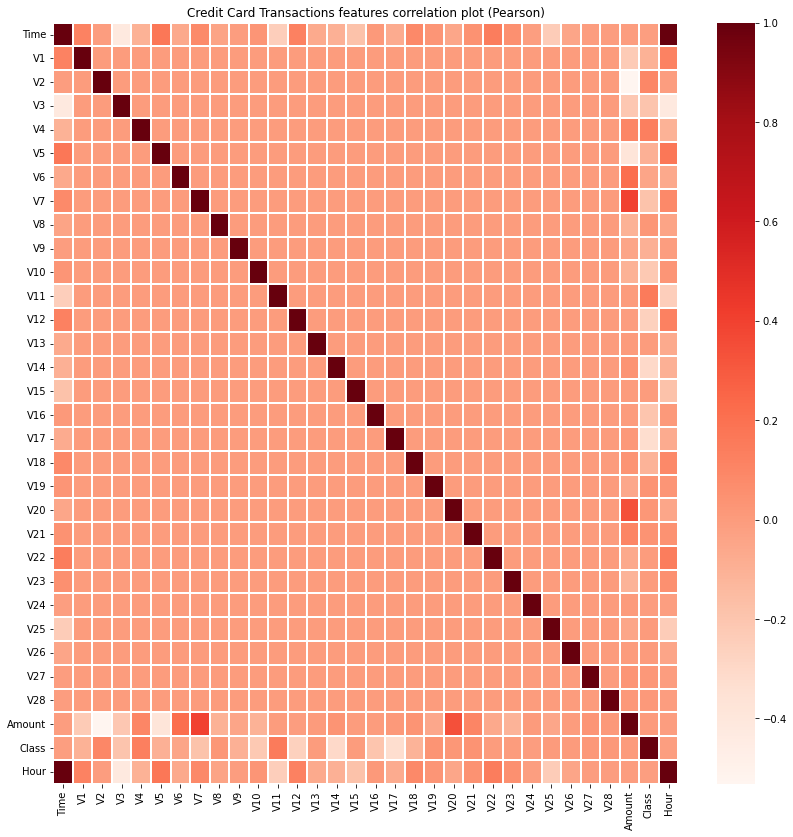

In [17]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).


# Features density plot

C:\ProgramData\Miniconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.

C:\ProgramData\Miniconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.

C:\ProgramData\Miniconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.

C:\ProgramData\Miniconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` an

<Figure size 432x288 with 0 Axes>

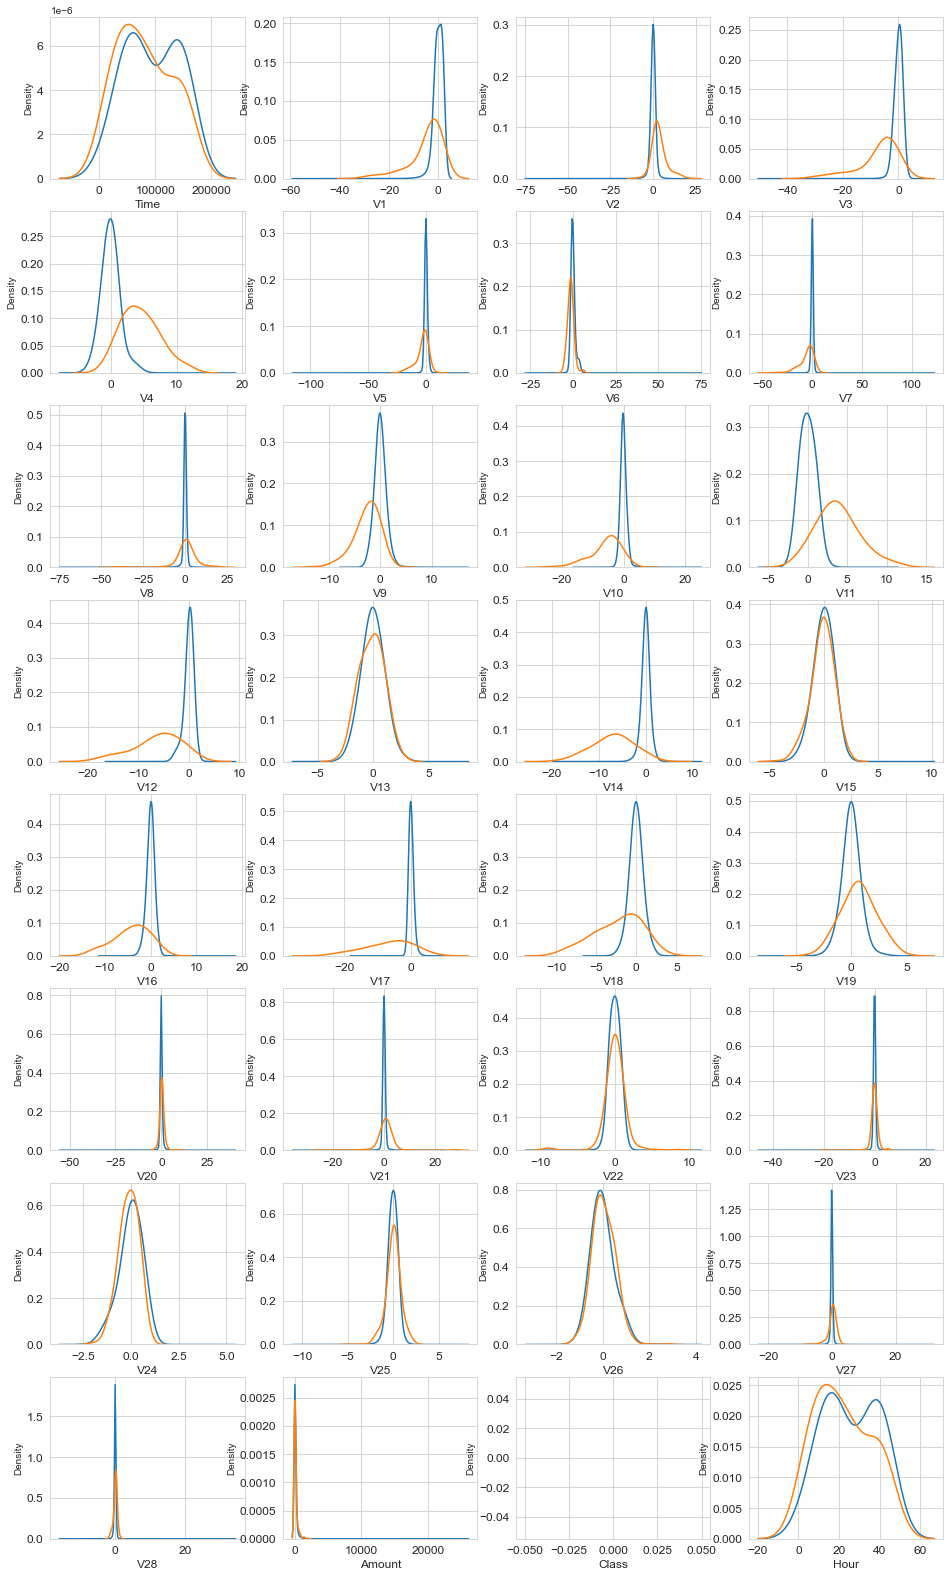

In [18]:
var = data.columns.values

i = 0
t0 = data.loc[data['Class'] == 0]
t1 = data.loc[data['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();    

# Normalizing the data

In [19]:
data['AmountNormalized'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data['AmountNormalized'].describe()

count    2.848070e+05
mean     2.913952e-17
std      1.000002e+00
min     -3.532294e-01
25%     -3.308401e-01
50%     -2.652715e-01
75%     -4.471707e-02
max      1.023622e+02
Name: AmountNormalized, dtype: float64

In [20]:
data[['AmountNormalized','Amount']]

,AmountNormalized,Amount
0,0.244964,149.62
1,-0.342475,2.69
2,1.160686,378.66
3,0.140534,123.50
4,-0.073403,69.99
...,...,...
284802,-0.350151,0.77
284803,-0.254117,24.79
284804,-0.081839,67.88
284805,-0.313249,10.00


# SMOTE

In [21]:
features = pd.get_dummies(data.drop('Class', axis = 1)).values
labels = data['Class'].values

In [22]:
sm = SMOTE(sampling_strategy = 'not majority', k_neighbors = 50, random_state = 202)

features_res, labels_res = sm.fit_resample(features, labels)

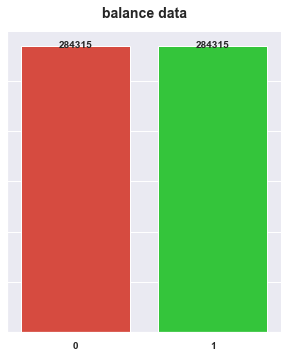

In [23]:
sns.set_style("dark")
sns.set(rc={"figure.figsize":(10, 10)}) 

labels_res_df = pd.DataFrame(labels_res, columns = ['y'])

fig_pallete = {0 : '#EF3627' , 1 : '#1CDD25'}

plot = sns.catplot(x = 'y', kind = 'count', data=labels_res_df, palette = fig_pallete)

plt.title('balance data', size = 14, fontweight = 'bold', pad = 14)
plot.set(ylabel = None)
plot.set(yticklabels=[])
plot.set(xlabel = None)
plot.set_xticklabels(size = 10, fontweight = 'bold')

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # bar index
        h+1000, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10)

In [24]:
X_unbal_train, X_unbal_test, y_unbal_train, y_unbal_test = train_test_split(features, labels, test_size = 0.2, random_state = 0)

In [25]:
X_bal_train, X_bal_test, y_bal_train, y_bal_test = train_test_split(features_res, labels_res, test_size = 0.2, random_state = 0)

In [26]:
unbal_array_accuracy = []
bal_array_accuracy = []
model_name = []

In [27]:
def evaluate_model(y_actual, y_pred, model_name):
    cm = metrics.confusion_matrix(y_actual, y_pred)
    print ('Confusion Matrix for {} Model'.format(model_name))
    print (cm)
    print ('Classification Report for {} Model'.format(model_name))
    print (metrics.classification_report(y_actual, y_pred))
#     print ('Area under under ROC curve for {} Model'.format(model_name))
#     print (metrics.roc_auc_score(y_actual, y_score))
#     plot_precision_recall_curve(y_actual, y_score, model_name)


# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
#For Unbalance Data

lr = LogisticRegression(solver='lbfgs', max_iter=1000)
#note y_train.ravel()
lr.fit(X_unbal_train, y_unbal_train)
y_pred_lr_unbal = lr.predict(X_bal_test)
y_score_lr_unbal = lr.decision_function(X_bal_test)

unbal_array_accuracy.append(accuracy_score(y_bal_test, y_pred_lr_unbal))
print("Mean Error: %.2f, Accuracy: %.2f"%(mean_absolute_error(y_bal_test, y_pred_lr_unbal),accuracy_score(y_bal_test, y_pred_lr_unbal)))
evaluate_model(y_bal_test, y_pred_lr_unbal, 'Logistic Regression')

Mean Error: 0.19, Accuracy: 0.81
Confusion Matrix for Logistic Regression Model
[[56712    12]
 [21031 35971]]
Classification Report for Logistic Regression Model
              precision    recall  f1-score   support

           0       0.73      1.00      0.84     56724
           1       1.00      0.63      0.77     57002

    accuracy                           0.81    113726
   macro avg       0.86      0.82      0.81    113726
weighted avg       0.86      0.81      0.81    113726



In [29]:
#For Balance Data

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_bal_train, y_bal_train)
y_pred_lr_bal = lr.predict(X_bal_test)
y_score_lr_bal = lr.decision_function(X_bal_test)

bal_array_accuracy.append(accuracy_score(y_bal_test, y_pred_lr_bal))
model_name.append('Logistic Regression')
print("Mean Error: %.2f, Accuracy: %.2f"%(mean_absolute_error(y_bal_test, y_pred_lr_bal),accuracy_score(y_bal_test, y_pred_lr_bal)))
evaluate_model(y_bal_test, y_pred_lr_bal, 'Logistic Regression')

Mean Error: 0.04, Accuracy: 0.96
Confusion Matrix for Logistic Regression Model
[[54956  1768]
 [ 2791 54211]]
Classification Report for Logistic Regression Model
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     56724
           1       0.97      0.95      0.96     57002

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



# Decision Tree

In [30]:
#For unbalance data
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_unbal_train, y_unbal_train)
y_pred_dt_unbal = classifier.predict(X_bal_test)

unbal_array_accuracy.append(accuracy_score(y_bal_test, y_pred_dt_unbal))
print("Mean Error: %.2f, Accuracy: %.2f"%(mean_absolute_error(y_bal_test, y_pred_dt_unbal),accuracy_score(y_bal_test, y_pred_dt_unbal)))
evaluate_model(y_bal_test, y_pred_dt_unbal, 'Decision Tree')

Mean Error: 0.09, Accuracy: 0.91
Confusion Matrix for Decision Tree Model
[[56719     5]
 [10195 46807]]
Classification Report for Decision Tree Model
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     56724
           1       1.00      0.82      0.90     57002

    accuracy                           0.91    113726
   macro avg       0.92      0.91      0.91    113726
weighted avg       0.92      0.91      0.91    113726



In [31]:
#For BAlance Data
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_bal_train, y_bal_train)
y_pred_dt_bal = classifier.predict(X_bal_test)

bal_array_accuracy.append(accuracy_score(y_bal_test, y_pred_dt_bal))
model_name.append('Decision Tree')
print("Mean Error: %.2f, Accuracy: %.2f"%(mean_absolute_error(y_bal_test, y_pred_dt_bal),accuracy_score(y_bal_test, y_pred_dt_bal)))
evaluate_model(y_bal_test, y_pred_dt_bal, 'Decision Tree')

Mean Error: 0.00, Accuracy: 1.00
Confusion Matrix for Decision Tree Model
[[56513   211]
 [  148 56854]]
Classification Report for Decision Tree Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



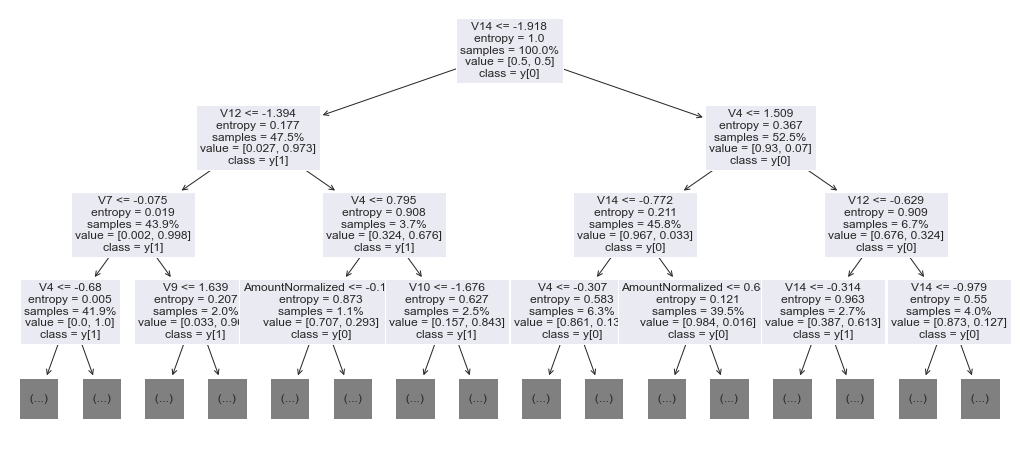

In [32]:
fgi = plt.figure(figsize = (18,8))
plot_tree(classifier, max_depth=3, class_names=True, proportion=True, feature_names=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Hour', 'AmountNormalized'], fontsize=12)
plt.show()
fgi.savefig('plot.png', dpi=1000, bbox_inches='tight')

# Random Forest

In [33]:
#For Unbalance Data
forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(X_unbal_train, y_unbal_train)
y_pred_rf_unbal = forest_model.predict(X_bal_test)

unbal_array_accuracy.append(accuracy_score(y_bal_test, y_pred_rf_unbal))
print("Mean Error: %.2f, Accuracy: %.2f"%(mean_absolute_error(y_bal_test, y_pred_rf_unbal),accuracy_score(y_bal_test, y_pred_rf_unbal)))
evaluate_model(y_bal_test, y_pred_rf_unbal, 'Random Forest')

Mean Error: 0.09, Accuracy: 0.91
Confusion Matrix for Random Forest Model
[[56721     3]
 [10162 46840]]
Classification Report for Random Forest Model
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     56724
           1       1.00      0.82      0.90     57002

    accuracy                           0.91    113726
   macro avg       0.92      0.91      0.91    113726
weighted avg       0.92      0.91      0.91    113726



In [34]:
#For balance data

forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(X_bal_train, y_bal_train)
y_pred_rf_bal = forest_model.predict(X_bal_test)

bal_array_accuracy.append(accuracy_score(y_bal_test, y_pred_rf_bal))
model_name.append('Random Forest')
print("Mean Error: %.2f, Accuracy: %.2f"%(mean_absolute_error(y_bal_test, y_pred_rf_bal),accuracy_score(y_bal_test, y_pred_rf_bal)))
evaluate_model(y_bal_test, y_pred_lr_bal, 'Random Forest')

Mean Error: 0.00, Accuracy: 1.00
Confusion Matrix for Random Forest Model
[[54956  1768]
 [ 2791 54211]]
Classification Report for Random Forest Model
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     56724
           1       0.97      0.95      0.96     57002

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



# KNN


In [35]:
# for un balanced data points

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_unbal_train, y_unbal_train)
y_pred_knn_unbal = knn_model.predict(X_bal_test)

unbal_array_accuracy.append(accuracy_score(y_bal_test, y_pred_knn_unbal))
print("Mean Error: %.2f, Accuracy: %.2f"%(mean_absolute_error(y_bal_test, y_pred_knn_unbal),accuracy_score(y_bal_test, y_pred_knn_unbal)))
evaluate_model(y_bal_test, y_pred_knn_unbal, 'KNN Classifier')

Mean Error: 0.48, Accuracy: 0.52
Confusion Matrix for KNN Classifier Model
[[56724     0]
 [54889  2113]]
Classification Report for KNN Classifier Model
              precision    recall  f1-score   support

           0       0.51      1.00      0.67     56724
           1       1.00      0.04      0.07     57002

    accuracy                           0.52    113726
   macro avg       0.75      0.52      0.37    113726
weighted avg       0.75      0.52      0.37    113726



In [36]:
# balanced data points
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_bal_train, y_bal_train)
y_pred_knn_bal = KNN.predict(X_bal_test)

bal_array_accuracy.append(accuracy_score(y_bal_test, y_pred_knn_bal))
model_name.append('KNN Model')
print("Mean Error: %.2f, Accuracy: %.2f"%(mean_absolute_error(y_bal_test, y_pred_knn_bal),accuracy_score(y_bal_test, y_pred_knn_bal)))
evaluate_model(y_bal_test, y_pred_knn_bal, 'KNN Classifier')

Mean Error: 0.13, Accuracy: 0.87
Confusion Matrix for KNN Classifier Model
[[51463  5261]
 [ 8968 48034]]
Classification Report for KNN Classifier Model
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     56724
           1       0.90      0.84      0.87     57002

    accuracy                           0.87    113726
   macro avg       0.88      0.87      0.87    113726
weighted avg       0.88      0.87      0.87    113726



[Info] Running KNN model for k=1
[Info] Running KNN model for k=3
[Info] Running KNN model for k=5
[Info] Running KNN model for k=7
[Info] Running KNN model for k=11
[Info] Running KNN model for k=13
[Info] Running KNN model for k=17
[Info] Running KNN model for k=25
[Info] Running KNN model for k=35
[Info] Running KNN model for k=51
[Info] Running KNN model for k=71
[Info] Running KNN model for k=101
[Info] Running KNN model for k=201
[Info] Running KNN model for k=301
[Info] Running KNN model for k=401
[Info] Running KNN model for k=501
[Info] Running KNN model for k=1001


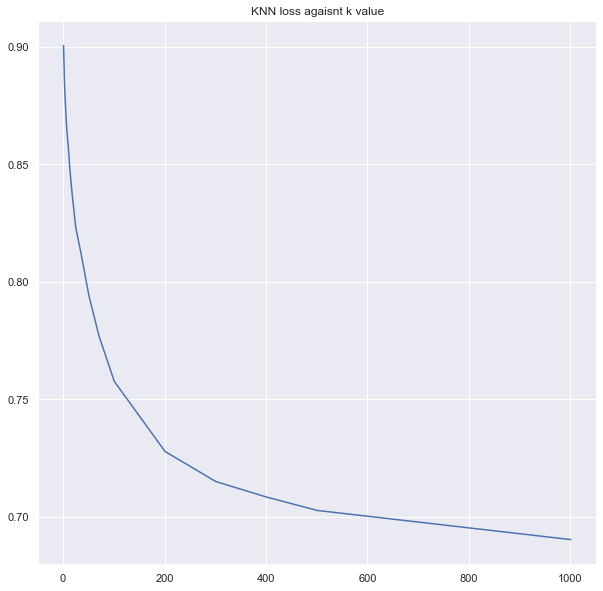

In [37]:
k_values = [1,3,5,7,11,13,17,25,35,51,71,101,201,301,401,501,1001]

mean_error_array = []

for i in k_values:
    print(f"[Info] Running KNN model for k={i}")
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_bal_train, y_bal_train)
    sample_predictions = knn_model.predict(X_bal_test[:10000])
    mean_error_array.append(accuracy_score(y_bal_test[:10000], sample_predictions))

plt.title("KNN loss agaisnt k value")
plt.plot(k_values, mean_error_array)
plt.show()

# XGBoost Classifier

In [38]:
# Unbalanced Classifier

xgb = XGBClassifier()
xgb.fit(X_unbal_train, y_unbal_train)
y_pred_xgb_unbal = xgb.predict(X_bal_test)

unbal_array_accuracy.append(accuracy_score(y_bal_test, y_pred_xgb_unbal))
print("Mean Error: %.2f, Accuracy: %.2f"%(mean_absolute_error(y_bal_test, y_pred_xgb_unbal),accuracy_score(y_bal_test, y_pred_xgb_unbal)))
evaluate_model(y_bal_test, y_pred_xgb_unbal, 'XGBoost Classifier')

C:\ProgramData\Miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[15:06:41] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Mean Error: 0.07, Accuracy: 0.93
Confusion Matrix for XGBoost Classifier Model
[[56721     3]
 [ 8218 48784]]
Classification Report for XGBoost Classifier Model
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     56724
           1       1.00      0.86      0.92     57002

    accuracy                           0.93    113726
   macro avg       0.94      0.93      0.93    113726
weighted avg       0.94      0.93      0.93    113726



In [39]:
# Balanced Classifier

xgb = XGBClassifier()
xgb.fit(X_bal_train, y_bal_train)
y_pred_xgb_bal = xgb.predict(X_bal_test)

bal_array_accuracy.append(accuracy_score(y_bal_test, y_pred_xgb_bal))
model_name.append('XGB Classifier')
print("Mean Error: %.2f, Accuracy: %.2f"%(mean_absolute_error(y_bal_test, y_pred_xgb_bal),accuracy_score(y_bal_test, y_pred_xgb_bal)))
evaluate_model(y_bal_test, y_pred_xgb_bal, 'XGBoost Classifier')

C:\ProgramData\Miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[15:07:31] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Mean Error: 0.00, Accuracy: 1.00
Confusion Matrix for XGBoost Classifier Model
[[56698    26]
 [    4 56998]]
Classification Report for XGBoost Classifier Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



# ANN

In [40]:
# Unbalanced data

mlp = MLPClassifier(learning_rate='adaptive', max_iter=500)
mlp.fit(X_unbal_train, y_unbal_train)
y_pred_mlp_unbal = mlp.predict(X_bal_test)

unbal_array_accuracy.append(accuracy_score(y_bal_test, y_pred_mlp_unbal))
print("Mean Error: %.2f, Accuracy: %.2f"%(mean_absolute_error(y_bal_test, y_pred_mlp_unbal),accuracy_score(y_bal_test, y_pred_mlp_unbal)))
evaluate_model(y_bal_test, y_pred_mlp_unbal, 'ANN Classifier')

Mean Error: 0.13, Accuracy: 0.87
Confusion Matrix for ANN Classifier Model
[[56674    50]
 [14732 42270]]
Classification Report for ANN Classifier Model
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     56724
           1       1.00      0.74      0.85     57002

    accuracy                           0.87    113726
   macro avg       0.90      0.87      0.87    113726
weighted avg       0.90      0.87      0.87    113726



In [41]:
mlp = MLPClassifier(learning_rate='adaptive', max_iter=500)
mlp.fit(X_bal_train, y_bal_train)
y_pred_mlp_bal = mlp.predict(X_bal_test)

bal_array_accuracy.append(accuracy_score(y_bal_test, y_pred_mlp_bal))
model_name.append('ANN Classifier')
print("Mean Error: %.2f, Accuracy: %.2f"%(mean_absolute_error(y_bal_test, y_pred_mlp_bal),accuracy_score(y_bal_test, y_pred_mlp_bal)))
evaluate_model(y_bal_test, y_pred_mlp_bal, 'ANN Classifier')

Mean Error: 0.02, Accuracy: 0.98
Confusion Matrix for ANN Classifier Model
[[56472   252]
 [ 2237 54765]]
Classification Report for ANN Classifier Model
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     56724
           1       1.00      0.96      0.98     57002

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



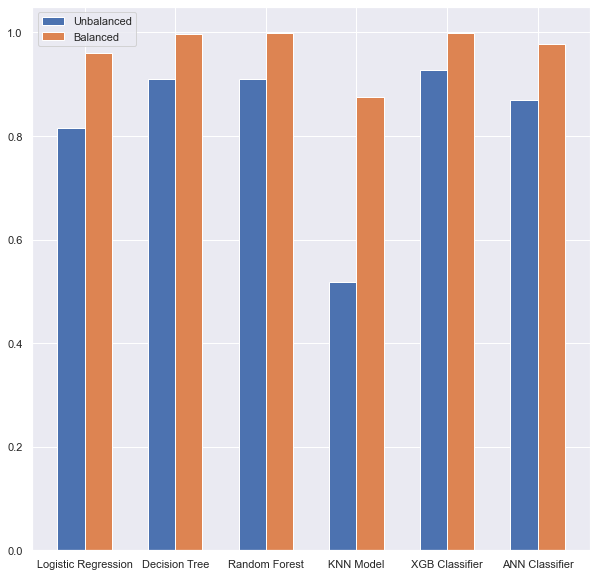

In [46]:
import numpy as np
plt.bar(np.arange(len(model_name)), unbal_array_accuracy, width=0.3)
plt.bar(np.arange(len(model_name))+0.3, bal_array_accuracy, width=0.3)
plt.legend(['Unbalanced', 'Balanced'])
plt.xticks(np.arange(len(model_name))+0.15, model_name)
plt.show()